# Visualize urban landunit
- This script is used to visualize urban landunit fractions in land surfaces of MCR.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter
import cartopy.feature as cfeature  
from matplotlib.ticker import MultipleLocator
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
ds_std = xr.open_dataset(home_path + '0_lcz_mcr/output_analysis/make_surface/surfdata_001x001_MCR_SSP3-7.0_2022_78pfts_c240930.nc')
ds_lcz = xr.open_dataset(home_path + '0_lcz_mcr/output_analysis/regional/lcz_map/surface_data/surfdata_001x001_MCR_LCZ_2022_78pfts_c240930.nc')

In [4]:
print(ds_std['PCT_URBAN'].mean(axis = (1,2)).values)

[ 0.          0.5668948  31.86077036]


In [5]:
print(ds_lcz['PCT_URBAN'].mean(axis = (1,2)).values)

[1.53445420e-01 1.42095339e-01 1.59667517e-01 1.28755581e-01
 2.90892257e+00 2.68267777e+01 0.00000000e+00 4.08256794e+00
 7.34013830e+00 1.79060275e-02]


In [3]:
row = 4
col = 3
matrix = [[0 for _ in range(col)] for _ in range(row)]
proj = ccrs.PlateCarree()
xwidth = 0.5
cmap = 'viridis'
#cmap = plt.cm.get_cmap('Wistia')
title = ['(a) High-density (HD)', '(b) Mid-density (MD)',
         '(c) Compact highrise (LCZ 1)', '(d) Compact midrise (LCZ 2)', '(e) Compact lowrise (LCZ 3)', 
         '(f) Open highrise (LCZ 4)', '(g) Open midrise (LCZ 5)', '(h) Open lowrise (LCZ 6)', 
         '(i) Large lowrise (LCZ 8)', '(j) Sparsely built (LCZ 9)','(k) Heavy industry (LCZ 10)']
yticks = [-50, -25, 0, 25, 50, 75]
crs = "EPSG:4326"
shapefile_path = home_path + 'dataset/Office_for_National_Statistics/county_boundary/Counties_and_Unitary_Authorities_December_2023_Boundaries_UK_BSC_4915494739307740134/CTYUA_DEC_2023_UK_BSC.shp'
gdf = gpd.read_file(shapefile_path)
gdf_platecarree = gdf.to_crs(crs)
greater_manchester_counties = ['Bolton', 'Bury', 'Manchester', 'Oldham', 'Rochdale','Salford', 'Stockport', 'Tameside', 'Trafford', 'Wigan']
gdf_greater_manchester = gdf_platecarree[gdf_platecarree['CTYUA23NM'].isin(greater_manchester_counties)]
extent = [gdf_greater_manchester.total_bounds[0], gdf_greater_manchester.total_bounds[2], gdf_greater_manchester.total_bounds[1], gdf_greater_manchester.total_bounds[3]]
fontsize = 6
labelfont = 6
length = 4
boundarywidth = 0.5
lcz_list = [1,2,3,4,5,6,8,9,10]
labelcolor = '#6b6b6b'
labelsize = 6
linewidth = 0.5
pad = 2
xticks = [-2.74, -2.50, -2.25, -2.00, -1.9]
yticks = [53.32, 53.50, 53.69]

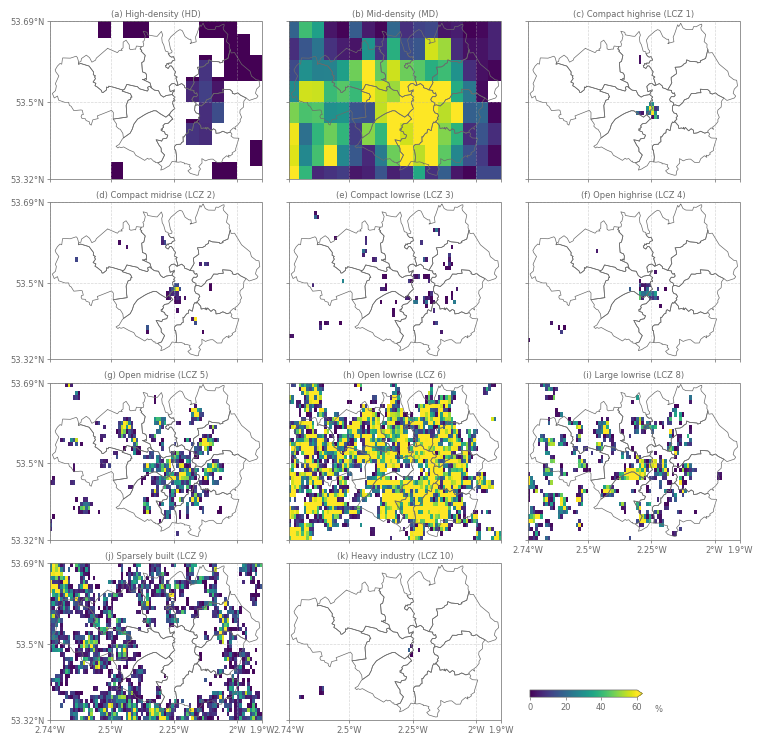

In [6]:
fig, axs = plt.subplots(row, col,figsize=(7.5, 7.25), subplot_kw={'projection': proj})
ax = axs.flatten()
ax[col*row-1].remove()
for i in range(row):
    for j in range(col):
        index = i * col +j 
        if index >= col * row - 1:
            continue
        if index < 2: 
            index_data = ds_std['PCT_URBAN'][index+1]
            lon = ds_std.LONGXY[0][:].values
            lat = ds_std.LATIXY[:,0].values
        elif (index < col*row-1) and (index >1):   
           index_lcz = lcz_list[index-2]
           index_data = ds_lcz['PCT_URBAN'][index_lcz-1]
           lon = ds_lcz.LONGXY[0][:].values
           lat = ds_lcz.LATIXY[:,0].values
        mask = index_data > 0
        data_filt = index_data.where(mask)
        #data_filt = np.ma.masked_array(index_data, mask=~mask)
        cs = ax[index].pcolormesh(lon, lat, data_filt[:,:] ,cmap=cmap, vmin=0, vmax=60)
        ax[index].set_extent(extent, crs=proj)
        
        if index in [0,3,6,9]:
            ax[index].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, labelsize=labelfont,pad=pad, color = labelcolor, width = xwidth,length = length/2)
        else:
            ax[index].tick_params(axis='y', which='both', left=True, right=False, labelleft=False, labelcolor=labelcolor, labelsize=0,pad=pad, color = labelcolor, width = xwidth,length = length/2)
        if index in [8,9,10]:
            ax[index].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,labelsize=labelfont,pad=pad, color = labelcolor, width = xwidth, length = length/2)
        else:
            ax[index].tick_params(axis='x', which='major', top=False, bottom=True, labelbottom=False, labelcolor=labelcolor,labelsize=0,pad=pad, color = labelcolor, width = xwidth, length = length/2)
        ax[index].set_xticks(xticks, crs = proj)
        ax[index].set_yticks(yticks, crs = proj) 
        ax[index].set_yticklabels(yticks)    
        ax[index].yaxis.set_major_formatter(LatitudeFormatter())
        ax[index].xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=False))
        ax[index].set_title(title[index], fontsize=labelsize, pad=3.5,color = labelcolor)
        #ax[index].set_ylim(-60, 75)
        ax[index].grid(True, which='major', axis='both',linestyle='--',linewidth=linewidth, alpha=0.5)
        #gdf_greater_manchester.dissolve().plot(ax=ax[index], edgecolor=labelcolor, linewidth = linewidth, facecolor='none')
        gdf_greater_manchester.plot(ax=ax[index], edgecolor=labelcolor, linewidth = linewidth, facecolor='none')
        for spine in ax[index].spines.values():
             spine.set_linewidth(xwidth)
             spine.set_edgecolor(labelcolor)
left = 0.7
bottom = 0.05
width = 0.15
height = 0.01        
cbar1 = fig.add_axes([left, bottom, width, height])
cbar1 = fig.colorbar(cs,ax=axs[1,:], cax=cbar1, shrink=0.63,orientation='horizontal',pad=0.1, extend='max', fraction=0.05)
cbar1.ax.tick_params(length=2, labelsize=labelsize, pad = pad, width=boundarywidth, color=labelcolor, labelcolor=labelcolor)
cbar1.outline.set_linewidth(boundarywidth)
cbar1.outline.set_edgecolor(labelcolor)
cbar1.ax.yaxis.label.set_color(labelcolor)
cbar1.set_label('%', fontsize=labelsize, color=labelcolor)
cbar1.ax.xaxis.set_label_coords(1.2, -1)

plt.subplots_adjust(left=0.06, right=0.98, bottom=0.01, top=0.99, wspace=0.125, hspace= 0.07)   
fig.savefig('PCT_URBAN.png',dpi=300)
fig.savefig('PCT_URBAN.pdf',dpi=600)